# Imports

In [16]:
import json 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Load and Read File 

In [17]:
df = pd.read_json('logins.json')

# Part 1 - Exploritory Data Analysis
Aggregation 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [19]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [20]:
#15 minute intervals - resample to show in 15 min chunks 
fifmin = df.resample('15Min').sum()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

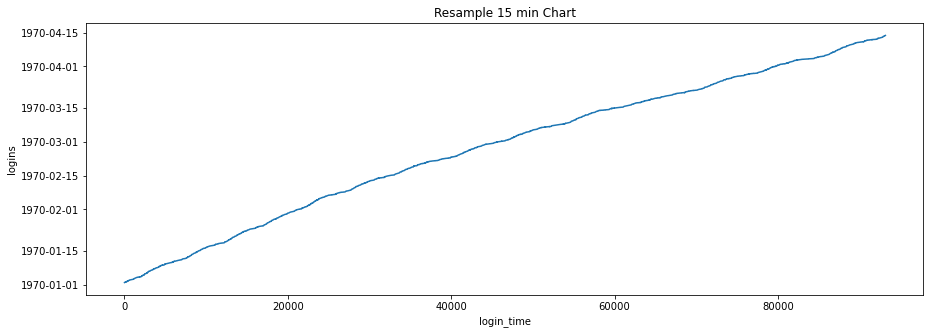

In [21]:
#visualization of resampled data
fig, ax = plt.subplots(figsize = (15,5))
plt.title('Resample 15 min Chart')
plt.xlabel('login_time')
plt.ylabel('logins')
plt.plot(df.login_time)

Describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand: Accoridng to the chart above, we see a consistint growth of the login_times grows over the eight years 

# Part 2 ‐ Experiment and metrics design


The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric? 

A:The key measure of success of this experiment in encouraging drive partners to serve both cities would be that the toll must have a proper tracking system on who had passed the toll, in addition to how much traffic would in in each geogrgrpahic location for the weekdays. I would say this because it provides proper insihgt off the the incoming and outgoing cars form Gotham and Metropolis and may be the eaiset to work with. 

Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success.

Please provide details on:
    a. How you will implement the experiment
    b. what statistical test(s) you will conduct to verify the significance of the
        observation
    c. how you would interpret the results and provide recommendations to the city
        operations team along with any caveats.
        
 A: this implement on the experiment would be done by using the two hypothesies above, and woulf follow up with obtaining the P-value. If the p-value is less grater than .05 for both tests, i would not reject the null hypothesis and if the p-value is less than .05, I would be sure to rejct both hypothesis. 
 


# Part 3 ‐ Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).



Data description
● city: city this user signed up in
● phone: primary device for this user
● signup_date: date of account registration; in the form ‘YYYYMMDD’
● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
● avg_dist: the average distance in miles per trip taken in the first 30 days after signup
● avg_rating_by_driver: the rider’s average rating over all of their trips
● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
● surge_pct: the percent of trips taken with surge multiplier > 1
● avg_surge: The average surge multiplier over all of this user’s trips
● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
● weekday_pct: the percent of the user’s trips occurring during a weekday

### Part 3 - Cleaning & Exploratory Data Analysis 

In [22]:
df1 = pd.read_json('ultimate_data_challenge.json')

In [23]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [24]:
user_data = pd.DataFrame(df1)

In [25]:
df1['signup_date'] = pd.to_datetime(df1['signup_date'])
df1['last_trip_date'] = pd.to_datetime(df1['last_trip_date'])

In [26]:
data_pull = df1.last_trip_date.max()

In [27]:
dt30 = data_pull - pd.Timedelta('30 days')